In [1]:
pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
def build_y_net(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Left CNN branch (Dilation Rate = 1)
    left = layers.Conv2D(32, (3, 3), activation='relu', padding='same', dilation_rate=1)(inputs)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    left = layers.Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    left = layers.Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    # Right CNN branch (Dilation Rate = 2)
    right = layers.Conv2D(32, (3, 3), activation='relu', padding='same', dilation_rate=2)(inputs)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    right = layers.Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    right = layers.Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    # Concatenate both branches
    merged = layers.concatenate([left, right])

    # Fully connected layers
    flat = layers.Flatten()(merged)
    dense1 = layers.Dense(256, activation='relu')(flat)
    dropout = layers.Dropout(0.5)(dense1)
    outputs = layers.Dense(num_classes, activation='softmax')(dropout)

    # Define model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Define parameters
input_shape = (32, 32, 3)
num_classes = 10

# Build the model
model = build_y_net(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 32)     │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 32)     │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 32)     │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 32)     │              0 │ dropout_3[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 16, 16, 64)     │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 16, 16, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 8, 64)       │              0 │ dropout_1[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 8, 8, 64)       │              0 │ dropout_4[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 8, 8, 128)      │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 8, 8, 128)      │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8, 8, 128)      │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 8, 8, 128)      │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2      

 Total params: 1,237,898 (4.72 MB)

 Trainable params: 1,237,898 (4.72 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def build_y_net(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Left CNN branch (Dilation Rate = 1)
    left = layers.Conv2D(32, (3, 3), activation='relu', padding='same', dilation_rate=1)(inputs)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    left = layers.Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    left = layers.Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = layers.Dropout(0.25)(left)
    left = layers.MaxPooling2D(pool_size=(2, 2))(left)

    # Right CNN branch (Dilation Rate = 2)
    right = layers.Conv2D(32, (3, 3), activation='relu', padding='same', dilation_rate=2)(inputs)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    right = layers.Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    right = layers.Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = layers.Dropout(0.25)(right)
    right = layers.MaxPooling2D(pool_size=(2, 2))(right)

    # Concatenate both branches
    merged = layers.concatenate([left, right])

    # Fully connected layers
    flat = layers.Flatten()(merged)
    dense1 = layers.Dense(256, activation='relu')(flat)
    dropout = layers.Dropout(0.5)(dense1)
    outputs = layers.Dense(num_classes, activation='softmax')(dropout)

    # Define model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Define parameters
input_shape = (32, 32, 3)
num_classes = 100

# Build the model
model = build_y_net(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 32, 32, 32)     │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 32, 32, 32)     │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 16, 16, 32)     │              0 │ dropout_7[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 16, 16, 32)     │              0 │ dropout_10[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 16, 16, 64)     │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 16, 16, 64)     │              0 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 8, 8, 64)       │              0 │ dropout_8[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 8, 8, 64)       │              0 │ dropout_11[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 128)      │         73,856 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 8, 8, 128)      │         73,856 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 8, 8, 128)      │              0 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 8, 8, 128)      │              0 │ conv2d_11[0][0]        │
├──────────────────────

 Total params: 1,261,028 (4.81 MB)

 Trainable params: 1,261,028 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the Y-network
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Save the trained model
model.save("y_net_cifar10.h5")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.0434 - loss: 4.3390 - val_accuracy: 0.1663 - val_loss: 3.7881
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1560 - loss: 3.5448 - val_accuracy: 0.2453 - val_loss: 3.4022
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2214 - loss: 3.1974 - val_accuracy: 0.2794 - val_loss: 3.1407
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2558 - loss: 3.0014 - val_accuracy: 0.3240 - val_loss: 2.9920
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2903 - loss: 2.8037 - val_accuracy: 0.3275 - val_loss: 2.8902
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3173 - loss: 2.6748 - val_accuracy: 0.3515 - val_loss: 2.7541
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3427 - loss: 2.5480 - val_accuracy: 0.3576 - val_loss: 2.6666
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3618 - loss: 2.4626 - val_accura

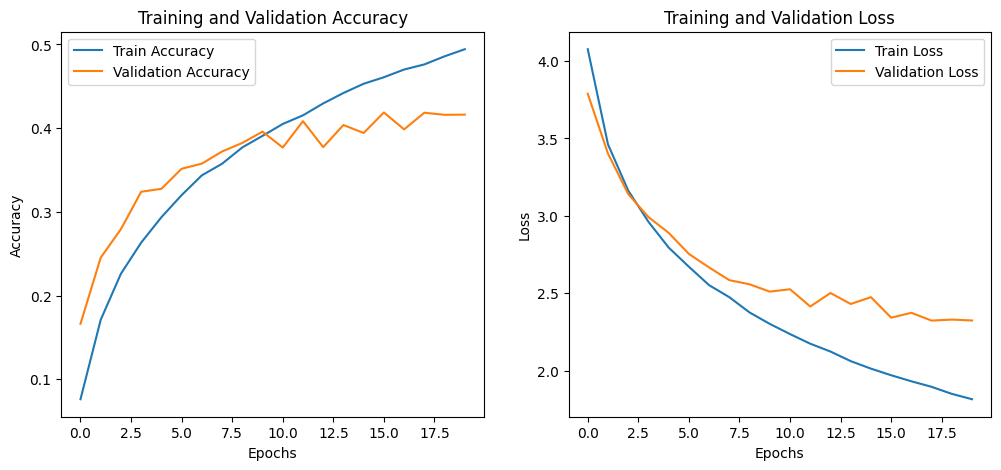

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


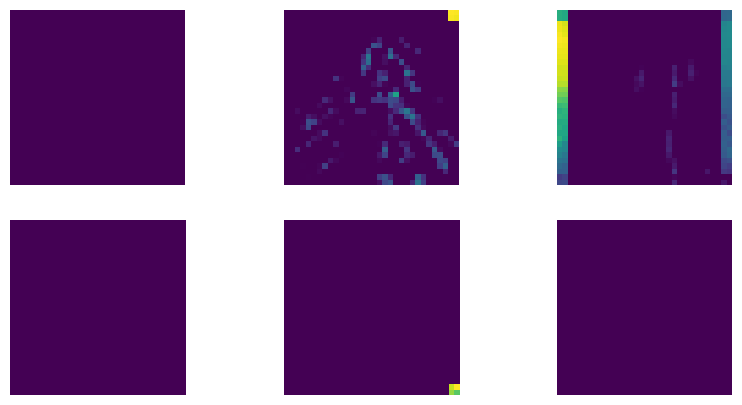

In [10]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Select a convolutional layer (e.g., first Conv2D layer)
layer_index = 2  # Change this to visualize different layers
feature_extractor = Model(inputs=model.input, outputs=model.layers[layer_index].output)

# Select a test image and expand dimensions
test_image = np.expand_dims(x_test[0], axis=0)  # Ensure it has batch dimension

# Get feature maps
feature_maps = feature_extractor.predict(test_image)

# Reshape feature maps
feature_maps = np.squeeze(feature_maps)  # Remove batch dimension

# Plot feature maps (first few channels)
num_feature_maps = min(6, feature_maps.shape[-1])  # Limit to 6 for display
plt.figure(figsize=(10, 5))

for i in range(num_feature_maps):
    plt.subplot(2, 3, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap='viridis')  # Use 'viridis' for better contrast
    plt.axis('off')

plt.show()



In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, BatchNormalization, concatenate



In [13]:
def build_optimized_y_net(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Left CNN branch (Dilation Rate = 1)
    left = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=1)(inputs)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.3)(left)

    left = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.3)(left)

    left = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.4)(left)

    # Right CNN branch (Dilation Rate = 2)
    right = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=2)(inputs)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.3)(right)

    right = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.3)(right)

    right = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.4)(right)

    # Concatenate both branches
    merged = concatenate([left, right])

    # Fully connected layers
    flat = Flatten()(merged)
    dense1 = Dense(512, activation='relu')(flat)
    dropout = Dropout(0.5)(dense1)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    return Model(inputs, outputs)

# Define model parameters
input_shape = (32, 32, 3)
num_classes = 10  # Change to 100 for CIFAR-100

# Build and compile the optimized model
model_opt = build_optimized_y_net(input_shape, num_classes)
model_opt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model_opt.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 16, 16, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 16, 16, 64)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 16, 16, 64)     │              0 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 16, 16, 64)     │              0 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16, 16, 128)    │            512 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 16, 16, 128)    │            512 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 8, 8, 128)      │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 8, 8, 128)      │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 4,945,162 (18.86 MB)

 Trainable params: 4,943,370 (18.86 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [16]:
def build_optimized_y_net(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Left CNN branch (Dilation Rate = 1)
    left = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=1)(inputs)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.3)(left)

    left = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.3)(left)

    left = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=1)(left)
    left = BatchNormalization()(left)
    left = MaxPooling2D(pool_size=(2, 2))(left)
    left = Dropout(0.4)(left)

    # Right CNN branch (Dilation Rate = 2)
    right = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=2)(inputs)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.3)(right)

    right = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.3)(right)

    right = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=2)(right)
    right = BatchNormalization()(right)
    right = MaxPooling2D(pool_size=(2, 2))(right)
    right = Dropout(0.4)(right)

    # Concatenate both branches
    merged = concatenate([left, right])

    # Fully connected layers
    flat = Flatten()(merged)
    dense1 = Dense(512, activation='relu')(flat)
    dropout = Dropout(0.5)(dense1)
    outputs = Dense(num_classes, activation='softmax')(dropout)

    return Model(inputs, outputs)

# Define model parameters
input_shape = (32, 32, 3)
num_classes = 100  # for CIFAR-100

# Build and compile the optimized model
model_opt = build_optimized_y_net(input_shape, num_classes)
model_opt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model_opt.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 32, 32, 64)     │            256 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 64)     │            256 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 16, 16, 64)     │              0 │ batch_normalization_7… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 16, 16, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 16, 16, 64)     │              0 │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 16, 16, 64)     │              0 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 16, 16, 128)    │         73,856 │ dropout_24[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 16, 16, 128)    │            512 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 16, 16, 128)    │            512 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 8, 8, 128)      │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 8, 8, 128)      │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 4,991,332 (19.04 MB)

 Trainable params: 4,989,540 (19.03 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [18]:
# Train the optimized Y-Net model
history_opt = model_opt.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test)
)

model_opt.save("optimized_y_net_cifar10.h5")



Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4960 - loss: 1.8747 - val_accuracy: 0.4814 - val_loss: 2.0102
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4996 - loss: 1.8477 - val_accuracy: 0.4769 - val_loss: 2.0639
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5166 - loss: 1.7769 - val_accuracy: 0.4520 - val_loss: 2.1817
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5253 - loss: 1.7273 - val_accuracy: 0.4494 - val_loss: 2.2917
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5307 - loss: 1.6986 - val_accuracy: 0.4501 - val_loss: 2.2422
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.5423 - loss: 1.6652 - val_accuracy: 0.4945 - val_loss: 1.9917
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5538 - loss: 1.6191 - val_accuracy: 0.4998 - val_loss: 1.9817
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5601 - loss: 1.5855 - 

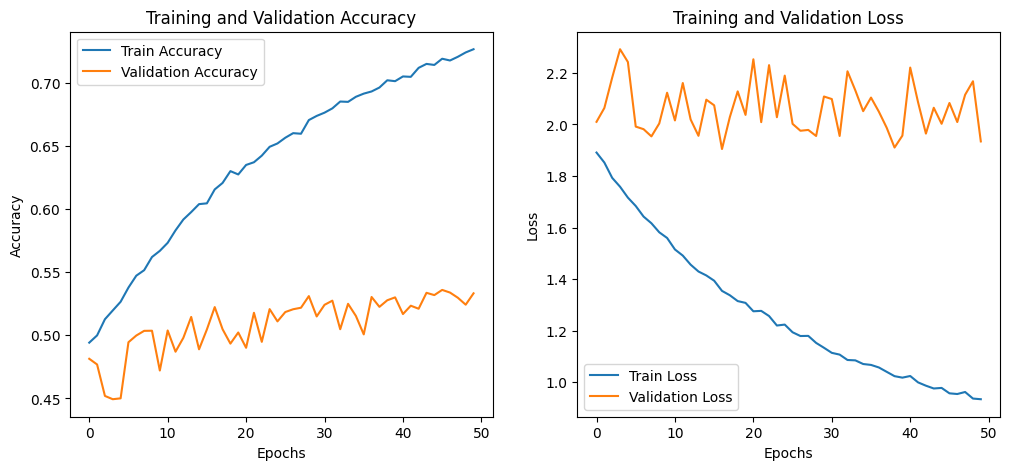

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_opt.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_opt.history['loss'], label='Train Loss')
plt.plot(history_opt.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


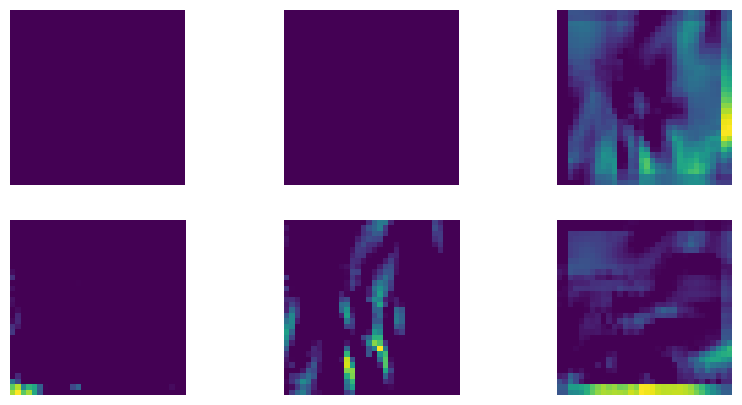

In [20]:
from tensorflow.keras.models import Model
import numpy as np

# Select a convolutional layer (e.g., first Conv2D layer)
layer_index = 2  # Change to visualize different layers
feature_extractor = Model(inputs=model_opt.input, outputs=model_opt.layers[layer_index].output)

# Pick a test image and expand dimensions
test_image = np.expand_dims(x_test[5], axis=0)

# Extract feature maps
feature_maps = feature_extractor.predict(test_image)

# Remove batch dimension
feature_maps = np.squeeze(feature_maps)

# Plot feature maps (first 6 filters)
num_feature_maps = min(6, feature_maps.shape[-1])
plt.figure(figsize=(10, 5))

for i in range(num_feature_maps):
    plt.subplot(2, 3, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap='viridis')
    plt.axis('off')

plt.show()
